In [1]:
import bct
import os
import sys
import pandas as pd
import numpy as np
from nilearn import image, plotting
%gui qt

def array_to_matrix(array):
    N = max(np.max(array['start']), np.max(array['end']))
    connectome_matrix = np.zeros((N,N))
    temp = array.to_numpy()
    for edge in temp:
        start = int(edge[0]-1)
        end = int(edge[1]-1)
        connectome_matrix[start, end] = edge[2]
        connectome_matrix[end, start] = edge[2]
    
    return connectome_matrix

In [2]:
# Load phenotypic data
pheno_data = pd.read_csv('NKI1.csv')

current_mdd = pheno_data[pheno_data['CURRENT_DX_1'].str.contains('Major Depressive Disorder') & pheno_data['SESSION'].str.contains('Baseline')]
lifetime_mdd = pheno_data[pheno_data['LIFETIME_DX_1'].str.contains('Major Depressove Disorder') & pheno_data['SESSION'].str.contains('Baseline')]
mdd_pheno = pd.concat([current_mdd, lifetime_mdd], ignore_index=True)
mdd_subjects = mdd_pheno['SUBID'].to_list()
mdd_subjects.append(4288245)
mdd_subjects.remove(3893245)
mdd_subjects.remove(8574662)

control_pheno = pheno_data[pheno_data['CURRENT_DIAGNOSIS'].str.contains('NO') & pheno_data['LIFETIME_DIAGNOSIS'].str.contains('NO') & pheno_data['SESSION'].str.contains('Baseline')]
control_subjects = control_pheno['SUBID'].to_list()
control_subjects.remove(1427581)
control_subjects.remove(21001)
control_subjects.append('0021001')

Sch400_path = r'NKI1_Connectomes\NKI1_Connectomes\Brodmann_space-MNI152NLin6_res-2x2x2'
mdd_connectome_paths     = [ os.path.join(Sch400_path, f'sub-{s}_ses-1_connectome.csv') for s in mdd_subjects ]
mdd_connectome_paths.extend([ os.path.join(Sch400_path, f'sub-{s}_ses-2_connectome.csv') for s in mdd_subjects ])
control_connectome_paths = [ os.path.join(Sch400_path, f'sub-{s}_ses-1_connectome.csv') for s in control_subjects ]
control_connectome_paths.extend([ os.path.join(Sch400_path, f'sub-{s}_ses-2_connectome.csv') for s in control_subjects ])

mdd_connectome_arrays     = [ pd.read_csv(p, header=None, delimiter=' ', names=['start', 'end', 'weight']) for p in mdd_connectome_paths ]
control_connectome_arrays = [ pd.read_csv(p, header=None, delimiter=' ', names=['start', 'end', 'weight']) for p in control_connectome_paths ]

mdd_connectome_matrices = []
for array in mdd_connectome_arrays:
    if len(mdd_connectome_matrices) == 0: mdd_connectome_matrices = array_to_matrix(array)
    else:
        mdd_connectome_matrices = np.dstack([mdd_connectome_matrices, array_to_matrix(array)])

control_connectome_matrices = []
for array in control_connectome_arrays:
    if len(control_connectome_matrices) == 0: control_connectome_matrices = array_to_matrix(array)
    else:
        control_connectome_matrices = np.dstack([control_connectome_matrices, array_to_matrix(array)])

(200, 3)
200


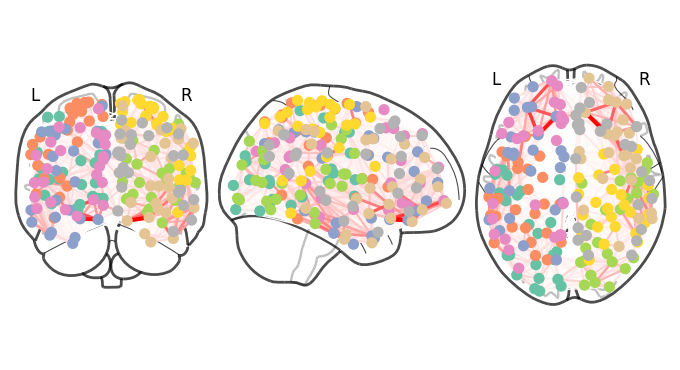

In [7]:
# connectome_array = pd.read_csv(r'NKI1_Connectomes\NKI1_Connectomes\Schaefer200_space-MNI152NLin6_res-2x2x2\sub-0021001_ses-1_connectome.csv', header=None, delimiter=' ', names=['start', 'end', 'weight'])
# img = image.smooth_img(r'anatomy\0021001\Schaefer200_space-MNI152NLin6_res-2x2x2_reor_RAS.nii', None)
# plotting.plot_roi(img, bg_img=None)
# node_coords, labels = plotting.find_parcellation_cut_coords(img, return_label_names=True)
# print(node_coords.shape)

# N = max(np.max(connectome_array['start']), np.max(connectome_array['end']))
# print(N)

# connectome_matrix = np.zeros((N,N))
# temp = connectome_array.to_numpy()
# for edge in temp:
    # start = int(edge[0]-1)
    # end = int(edge[1]-1)
    # connectome_matrix[start, end] = edge[2]
    # connectome_matrix[end, start] = edge[2]

# plotting.plot_connectome(connectome_matrix, node_coords=node_coords)

In [3]:
# results_3_4 = []
# for i in np.arange(0, 5.25, 0.25):
    # print(f'i={i}')
    # res = bct.nbs.nbs_bct(control_connectome_matrices, mdd_connectome_matrices, thresh=i, k=100)
    # results_3_4.append(res)


print(control_connectome_matrices.shape)    
print(mdd_connectome_matrices.shape)    
res = bct.nbs.nbs_bct(control_connectome_matrices, mdd_connectome_matrices, thresh=2.5, k=1000, verbose=True)


(41, 41, 24)
(41, 41, 6)
max component size is 44
estimating null distribution with 1000 permutations
permutation 0 of 1000.  Permutation max is 5.0.  Observed max is 44.0.  P-val estimate is 0.000
permutation 1 of 1000.  Permutation max is 33.0.  Observed max is 44.0.  P-val estimate is 0.000
permutation 2 of 1000.  Permutation max is 11.0.  Observed max is 44.0.  P-val estimate is 0.000
permutation 3 of 1000.  Permutation max is 7.0.  Observed max is 44.0.  P-val estimate is 0.000
permutation 4 of 1000.  Permutation max is 3.0.  Observed max is 44.0.  P-val estimate is 0.000
permutation 5 of 1000.  Permutation max is 70.0.  Observed max is 44.0.  P-val estimate is 0.167
permutation 6 of 1000.  Permutation max is 4.0.  Observed max is 44.0.  P-val estimate is 0.143
permutation 7 of 1000.  Permutation max is 14.0.  Observed max is 44.0.  P-val estimate is 0.125
permutation 8 of 1000.  Permutation max is 27.0.  Observed max is 44.0.  P-val estimate is 0.111
permutation 9 of 1000.  Permu

In [24]:
brodmann_mapping = pd.read_csv('Brodmann.csv', index_col=0, header=None).iloc[1:].reset_index()[1]
brodmann_mapping = [s[14:] for s in brodmann_mapping ]
print(brodmann_mapping)

avg_control_matrix = np.mean(control_connectome_matrices, axis=2)
avg_mdd_matrix = np.mean(mdd_connectome_matrices, axis=2)

# print(avg_mdd_matrix[14, 22])
# print(avg_control_matrix[14, 22])

print(control_connectome_matrices[14, 22, 5])
print(mdd_connectome_matrices[14, 22, 4])

avg_diff = np.log2(avg_control_matrix/avg_mdd_matrix)
diff_matrix = pd.DataFrame(avg_diff * res[1].astype(int))
diff_matrix.index = brodmann_mapping
# diff_matrix = avg_diff * res[1].astype(int)

diff_matrix.to_csv('diff_component.adj', header=None)
print(res[1])
# np.savetxt('diff_component.adj', diff_matrix, delimiter=',')

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11_12', '17', '18', '19', '20', '21', '22', '23_31', '24', '25', '26', '27', '28', '29', '30', '32_33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '16']
1763.0
4474.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\olson\AppData\Local\Temp\ipykernel_992\2178005800.py:14: RuntimeWarning: invalid value encountered in divide
  avg_diff = np.log2(avg_control_matrix/avg_mdd_matrix)


<Axes: xlabel='weight', ylabel='Count'>

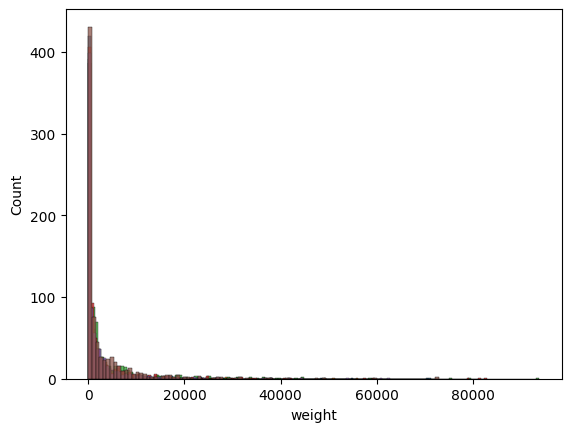

In [214]:
import seaborn as sns

sns.histplot(mdd_connectome_arrays[0], x='weight')
sns.histplot(mdd_connectome_arrays[1], x='weight')
sns.histplot(mdd_connectome_arrays[2], x='weight')
sns.histplot(mdd_connectome_arrays[3], x='weight')
sns.histplot(mdd_connectome_arrays[4], x='weight')
sns.histplot(mdd_connectome_arrays[5], x='weight')

# sns.histplot(control_connectome_arrays[0], x='weight', binrange=(0,4000))
# sns.histplot(control_connectome_arrays[1], x='weight', binrange=(0,4000))
# sns.histplot(control_connectome_arrays[2], x='weight', binrange=(0,4000))